## Name: [muhammed Ahmed Farouq]
## ID: [1710672]

# <center><font color=darkred>Lab 7 </font>

## Lab Goals:
    1. Quick overview of some examples in lecture6.
    2. Work with hands-on examples on: Color image processing

# <font color=darkred size=4>1-Needed Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte,img_as_float
from skimage import data, io, filters
from scipy.ndimage import convolve, filters
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap
from skimage.color import rgb2gray,gray2rgb,rgb2hsv
from skimage import color
from skimage.exposure import rescale_intensity
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage.filters import laplace ,sobel, roberts
import scipy
from scipy.ndimage import convolve, filters

# Show image:

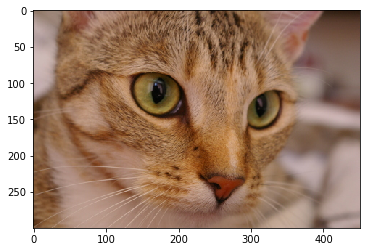

In [ ]:
cat = data.chelsea()
plt.imshow(cat)

### Print shape of image:

In [ ]:
print(cat.shape)

(300, 451, 3)


### Display red,green and blue image (the channels):

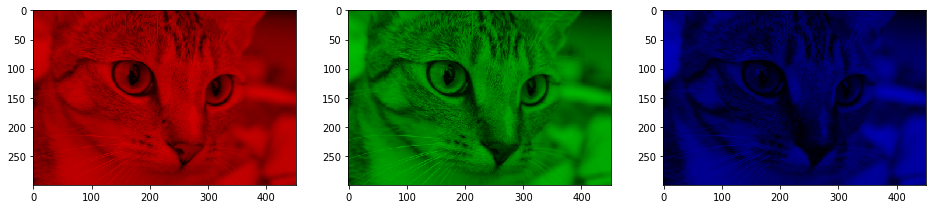

In [ ]:
red_multiplier   = [1, 0, 0]
green_multiplier = [0, 1, 0]
blue_multiplier  = [0, 0, 1]

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(16, 8))
ax1.imshow(red_multiplier   * cat)
ax2.imshow(green_multiplier * cat)
ax3.imshow(blue_multiplier  * cat)

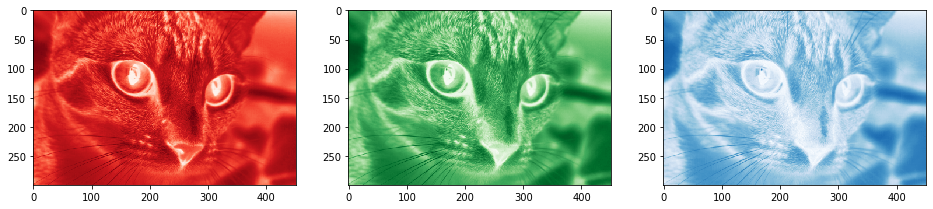

In [ ]:
# Splitting the image into R,G,B Channels

red = cat[:, :, 0]
green = cat[:, :, 1]
blue = cat[:, :, 2]

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(16, 8))
ax1.imshow(red, cmap='Reds')
ax2.imshow(green, cmap='Greens')
ax3.imshow(blue, cmap='Blues')
plt.show()

## Conversion from RGB to Gray:

### RGB to Gray:
    - The RGB is a 3 channel color scheme with Red, Blue and Green channels whereas the Gray is a 2 channel scheme.
    - This technique is used as a pre-processing step in many image processing techniques like thresholding/ binarization. This is very useful when you do not need a 3 channel pixel like (120,140,30) for R, G, and B respectively but have just one value like (133) which represents the gray channel.

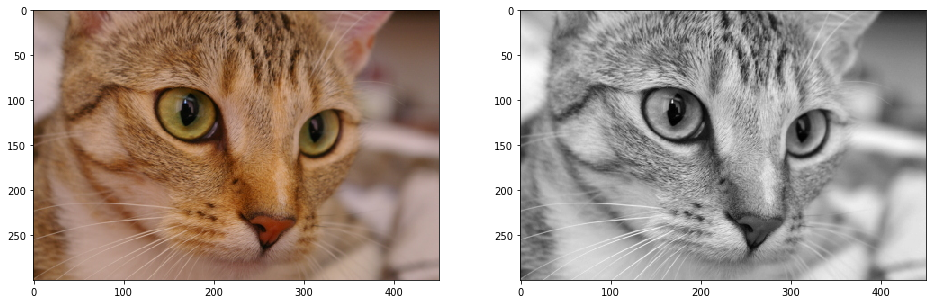

In [ ]:
grayscale = rgb2gray(cat)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 8))


ax1.imshow(cat)
ax2.imshow(grayscale, cmap=plt.cm.gray)
plt.show()

# Task 1:Implement your function to convert image from RGB to Grayscale?

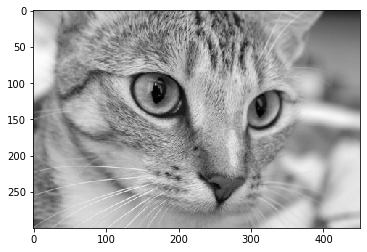

In [ ]:
def rgb2gray(img):
    r = img[:, :, 0]*0.3
    g = img[:, :, 1]*0.59
    b = img[:, :, 2]*0.11
    gray =  r + g +  b
    return gray
plt.imshow(rgb2gray(cat), 'gray')

## Conversion from Grayscale to RGB: 

### Gray to RGB:
    - There are cases when you have a single channel grayscale image and you want to convert into a 3 channel image, then it can be done by using the gray2rgb method of scikitImage. What you must understand is that this does not convert a grayscale image to color. that is a black and white image, remains black and white image after conversion. The only thing that changes is that, before the conversion happens, each pixel are represented as a single value, example: (120) and after conversion, it is represented in 3 channels. Example: (120,120,120). Thus, you will have an RGB image.

(512, 512)
(512, 512, 3)


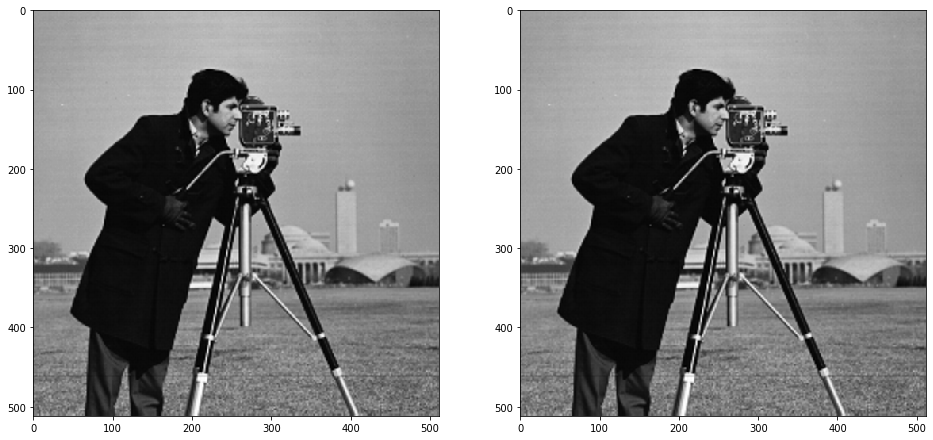

In [ ]:
camera = data.camera()
print(camera.shape)
rgbscale = gray2rgb(camera)
print(rgbscale.shape)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(camera, 'gray')
ax2.imshow(rgbscale, 'jet')
plt.show()

# As you can see, there is no visual change.

## Display sharpining color image using sobel filter:

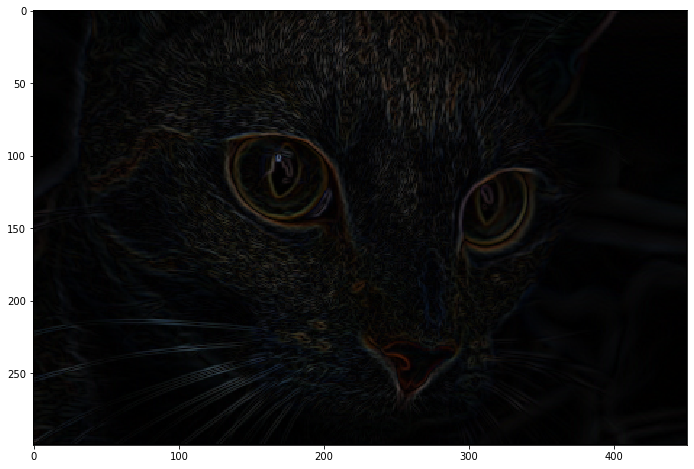

In [ ]:
@adapt_rgb(each_channel)
def sobel_each(cat):
    return sobel(cat)

fig, ax = plt.subplots(1, figsize=[16, 8])
ax.imshow(sobel_each(cat))
#rescale_intensity(1 - sobel_each(cat))

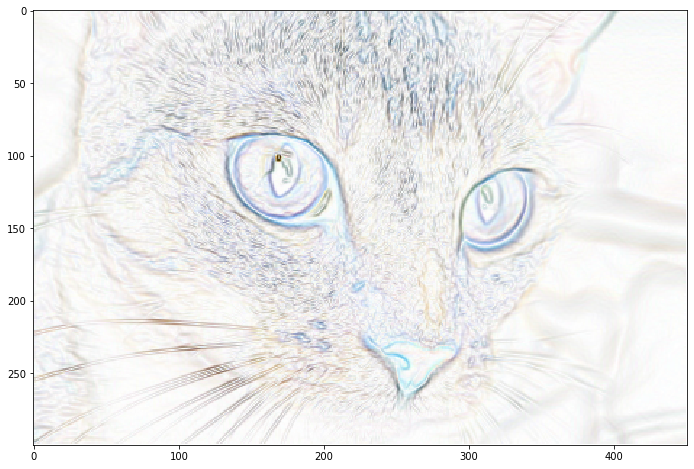

In [ ]:
@adapt_rgb(each_channel)
def sobel_each(cat):
    return sobel(cat)

fig, ax = plt.subplots(1, figsize=[16, 8])
ax.imshow(rescale_intensity(1 - sobel_each(cat)))

# Task 2:Implement your function to visualise laplace filtering in RGB?  

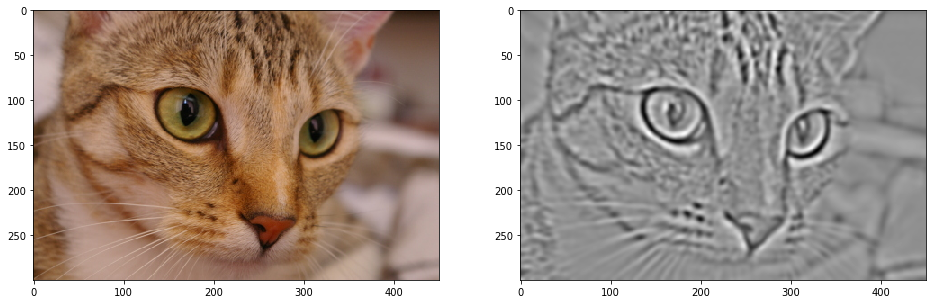

In [ ]:
def laplace_rgb(img):
    grayscale=np.copy(img)
    img1  = rgb2gray(grayscale)
    img1= filters.gaussian_filter(img1, (3,3), 0)
    laplacian_diagonal_operator = np.array([[ -1,  -1,  -1],
                                   [ -1,  8,  -1],
                                   [-1, -1, -1]]);
    
    img1= convolve(img1, laplacian_diagonal_operator)
                          
    return img1


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow( cat, 'jet')
ax2.imshow(laplace_rgb(cat), 'gray')
plt.show()    